# What Drives the Price of a Car?
![](images/kurt.jpeg)

## Overview
  
In this application, we will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure the speed of processing. The goal is to understand what factors make a car more or less expensive. As a result of the analysis, we can provide clear recommendations to the client(s) —a used car dealership— as to what consumers value in a used car.

## CRISP_DM Framework

<center>
    <img src = images/crisp.png>
</center>


To frame the task, throughout these practical applications, we will refer to a standard process in the industry for data projects called CRISP-DM. This process provides a framework for working through a data problem.

## Business Understaning

**Objective:** The primary objective is to determine what key attributes of an used vehicle drives the consumer behavior in an used automobile market. It has got past data of the vehicles and their different variables. We need to understand the data and make a project plan to achive this objective

## Data Understaning



*   Import the data
*   Analyse what columns or features could be important to achive the goal
*   Data quality check after identifying the kep features
    1.   If the data has missing values
    2.   If there are duplicate values
    3.   If the data has unwanted columns
    4.   If the column and column data are in right format
    5.   If the dataset contains highly correlated values
    6.   If the dataset has sufficient information to analyse the model














### Import Modules

In [1]:
import pandas as pd
import numpy as np
from scipy import stats


import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,6)
plt.style.use("fivethirtyeight")

# prepare data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# model
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.filterwarnings("ignore")

### Import Data

In [2]:
df = pd.read_csv('data/vehicles.csv')
orig_df = df.copy()

In [3]:
df.shape

(426880, 18)

In [4]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Cleaning

**Clean the column names if required**

In [6]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

**Duplicate Check and Removal**

In [7]:
sum(df.duplicated())

0

In [8]:
sum(df.duplicated(subset = ['VIN','price','odometer']))

215109

In [9]:
veh_drop_duplicates = df.drop_duplicates(subset = ['VIN','price','odometer'])
print("Number of dropped rows: ", df.shape[0] - veh_drop_duplicates.shape[0])
veh_drop_duplicates.shape
# veh_drop_duplicates.info()

Number of dropped rows:  215109


(211771, 18)

In [10]:
df = veh_drop_duplicates.copy()

**Drop unwanted columns**

In [11]:
df.drop(columns=['id','size','paint_color'], inplace = True)
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426760,wyoming,6250,2006.0,chevrolet,silverado 2500hd,good,8 cylinders,gas,200000.0,clean,automatic,NaN,4wd,truck,wy
426809,wyoming,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,NaN,4wd,SUV,wy
426819,wyoming,21990,2016.0,bmw,3 series 328i sedan 4d,good,NaN,other,26599.0,clean,automatic,WBA8E9C59GK648917,rwd,sedan,wy
426833,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,convertible,wy


**Missing Value Check & Imputation**

In [12]:
#df.isnull().sum()
df.isna().mean().round(4).multiply(100)

,0
region,0.00
price,0.00
year,0.32
manufacturer,3.96
model,1.23
condition,41.64
cylinders,36.30
fuel,0.82
odometer,0.96
title_status,1.99


In [13]:
df_analysis=df.convert_dtypes()
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211771 entries, 0 to 426838
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        211771 non-null  string
 1   price         211771 non-null  Int64 
 2   year          211090 non-null  Int64 
 3   manufacturer  203395 non-null  string
 4   model         209174 non-null  string
 5   condition     123587 non-null  string
 6   cylinders     134897 non-null  string
 7   fuel          210029 non-null  string
 8   odometer      209748 non-null  Int64 
 9   title_status  207566 non-null  string
 10  transmission  210423 non-null  string
 11  VIN           122920 non-null  string
 12  drive         154391 non-null  string
 13  type          163607 non-null  string
 14  state         211771 non-null  string
dtypes: Int64(3), string(12)
memory usage: 26.5 MB


In [14]:
from sklearn.preprocessing import LabelEncoder

for column in df_analysis.select_dtypes(include='string').columns:
    #df_analysis[column]=df_analysis[column].replace(np.nan, 'other')
    df_analysis[column].fillna(df_analysis[column].mode()[0], inplace=True)  # Impute with
    df_analysis[column] = LabelEncoder().fit_transform(df_analysis[column])


for column in df_analysis.select_dtypes(include='int64').columns:
    #df_analysis[column]=df_analysis[column].replace(np.nan, 0)
    df_analysis[column].fillna(df_analysis[column].median(), inplace=True)  # Impute with median
    df_analysis[column] = LabelEncoder().fit_transform(df_analysis[column])

## EDA

In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [16]:
df_analysis[['price']].describe()

,price
count,211771.00
mean,5007.29
std,4093.35
min,0.00
25%,1647.00
50%,3754.00
75%,7798.00
max,15654.00


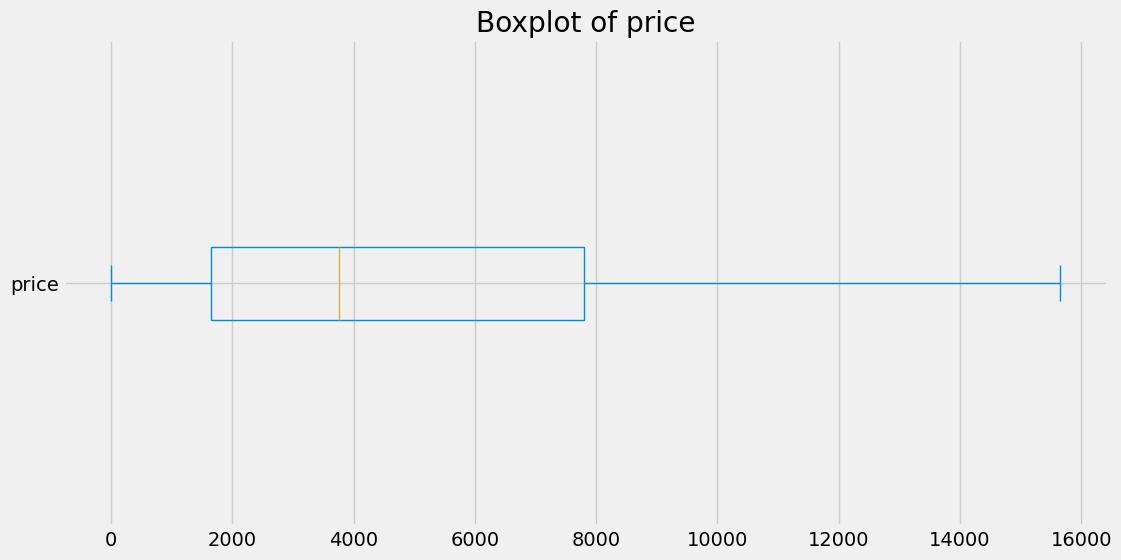

In [17]:
df_analysis['price'].plot(kind = 'box', vert = False, title = "Boxplot of price");

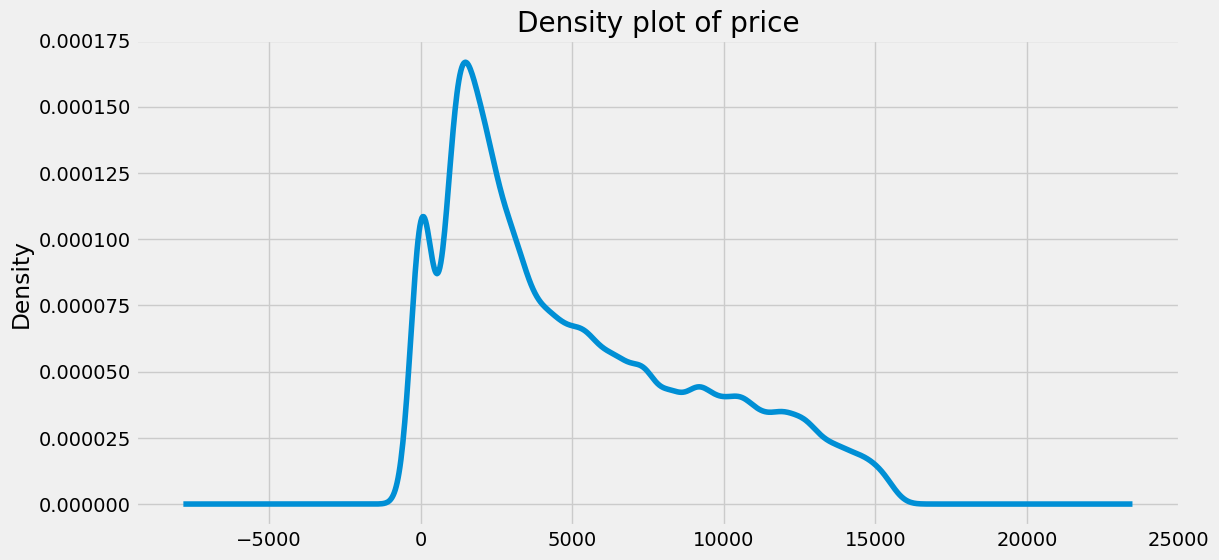

In [18]:
df_analysis['price'].plot(kind = 'density', title = "Density plot of price");

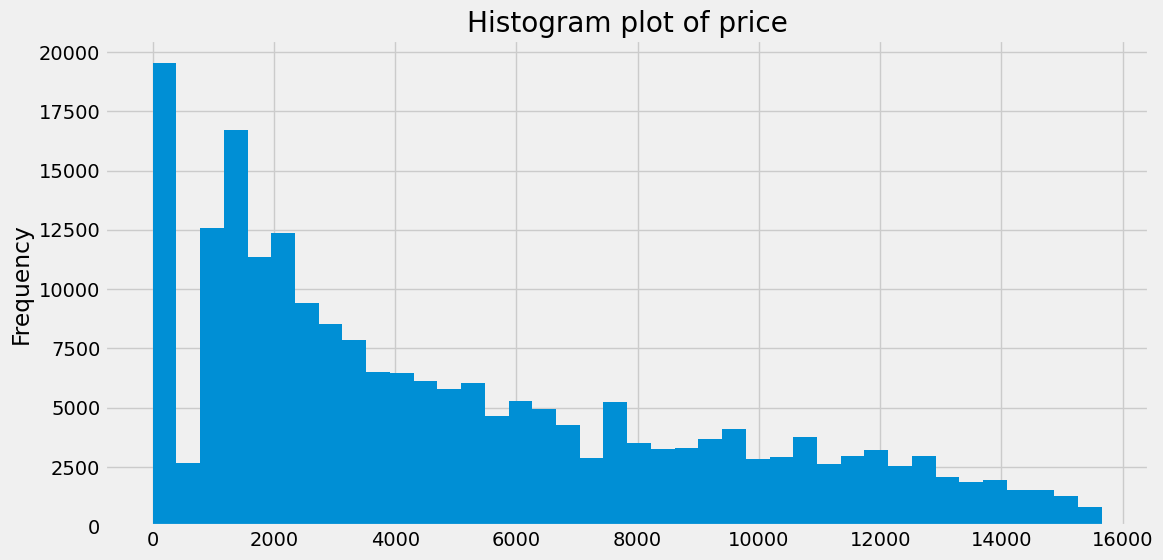

In [19]:
df_analysis['price'].plot(kind = 'hist', bins = 40, title = "Histogram plot of price");

In [20]:
df_analysis["price_log"] = np.log(df_analysis['price'])

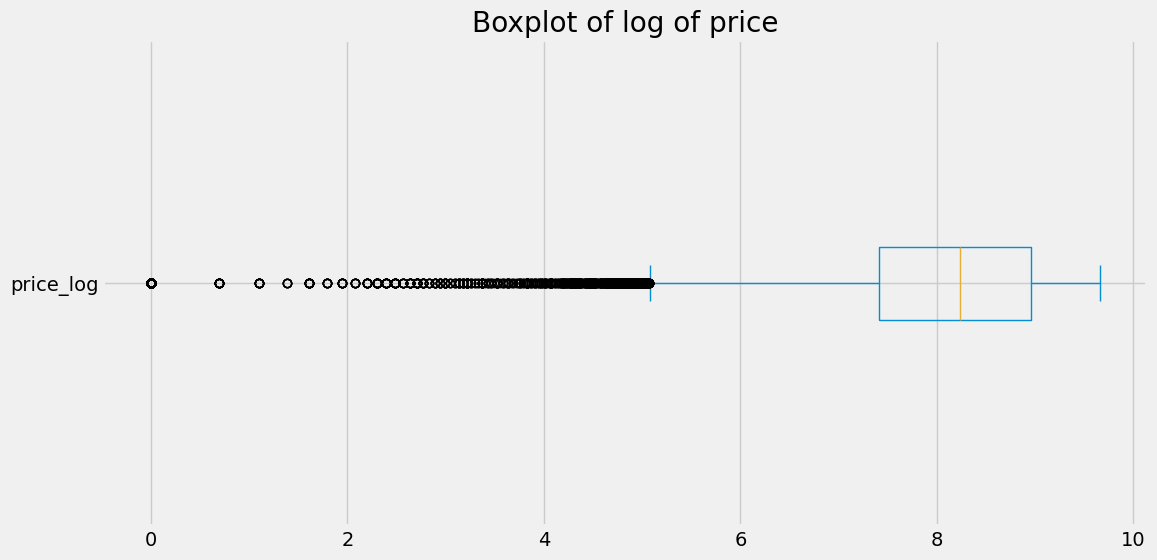

In [21]:
df_analysis['price_log'].plot(kind = 'box', vert = False, title = "Boxplot of log of price");

In [22]:
df_analysis.drop(columns=['price_log'], inplace = True)

## Outlier Treatment

### Z-Score

In [23]:
df_analysis.shape

(211771, 15)

In [24]:
df_zscore = df_analysis[np.abs(stats.zscore(df_analysis['price'])) < 2].copy()
df_zscore.shape

(202281, 15)

In [25]:
zscore_data_lost = 1-(df_zscore.shape[0]/df_analysis.shape[0])
print("We loose {:.2%} of the data by the z-score method".format(zscore_data_lost))

We loose 4.48% of the data by the z-score method


### IQR Treamment (using IQR)

In [26]:
iqr = df_analysis['price'].quantile(.75) - df_analysis['price'].quantile(.25)
iqr

6151.0

In [27]:
lower_bound = df_analysis['price'].quantile(.25) - 1.5 * iqr
upper_bound = df_analysis['price'].quantile(.75) + 1.5 * iqr
df_iqr = df_analysis[(df_analysis['price'] > lower_bound) & (df_analysis['price'] < upper_bound)].copy()

In [28]:
iqr_data_lost = 1-(df_iqr.shape[0]/df_analysis.shape[0])
print("We lost {:.2%} of the data by the IQR method".format(iqr_data_lost))

We lost 0.00% of the data by the IQR method


In [29]:
#df_iqr.info

In [30]:
df_iqr['price'].describe()

,price
count,211771.00
mean,5007.29
std,4093.35
min,0.00
25%,1647.00
50%,3754.00
75%,7798.00
max,15654.00


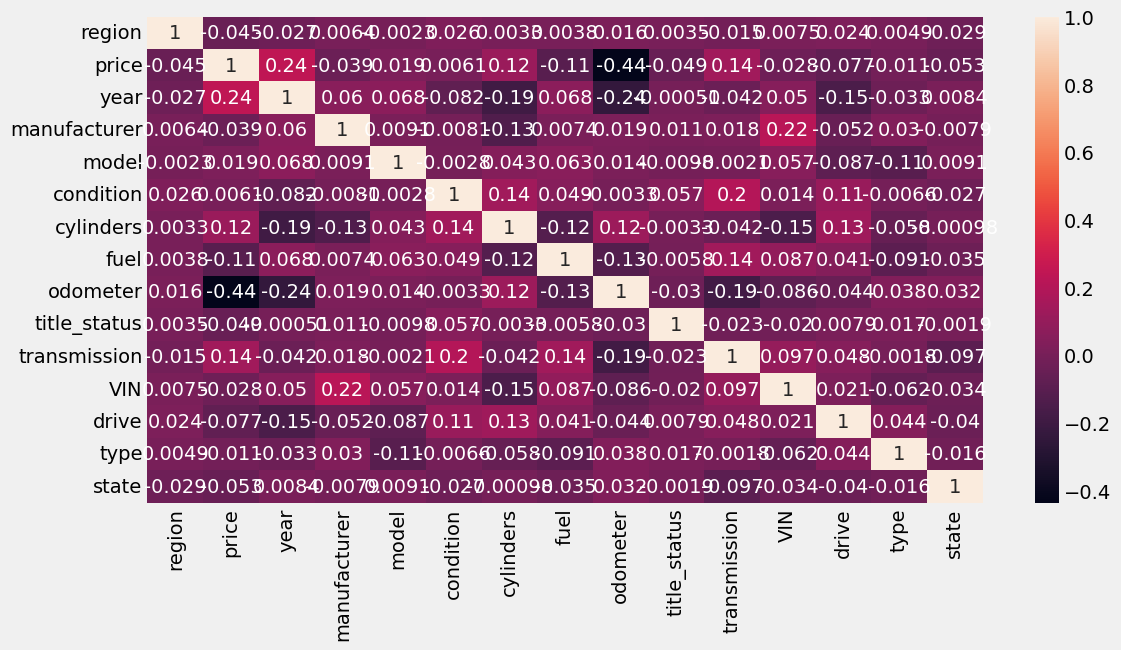

In [31]:
corr = df_iqr.corr(numeric_only = True)
sns.heatmap(corr, annot = True);

## Univariate/Bivariate Analysis

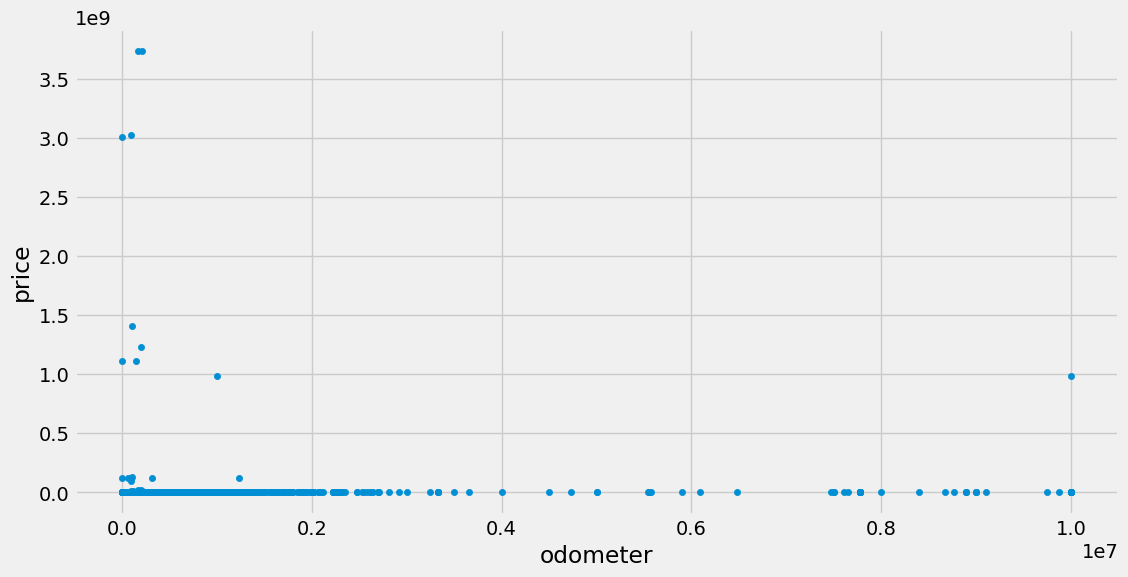

In [32]:
df.plot(kind = "scatter", x = "odometer", y = "price");

In [33]:
df.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,184380.00,105889.60,16255850.47,0.00,5250.00,10995.00,19997.00,3736928711.00
manual,14827.00,326216.39,19193587.27,0.00,4500.00,9500.00,18694.50,1410065407.00
other,11216.00,36251.44,1170505.87,0.00,16500.00,22990.00,31590.00,123456789.00


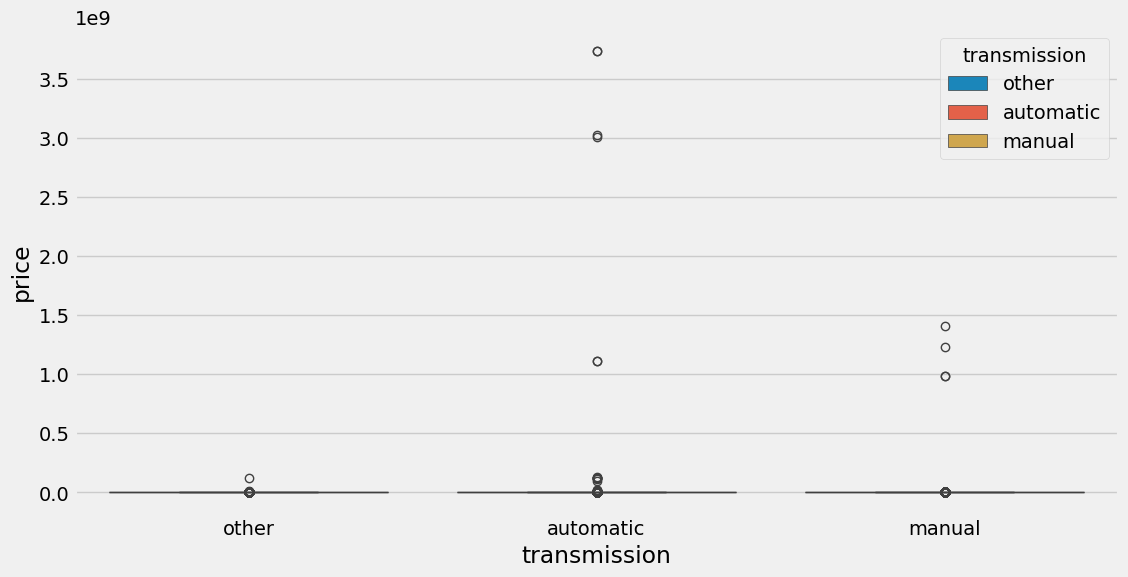

In [34]:
sns.boxplot(x = 'transmission', y = 'price', data = df, hue = "transmission");

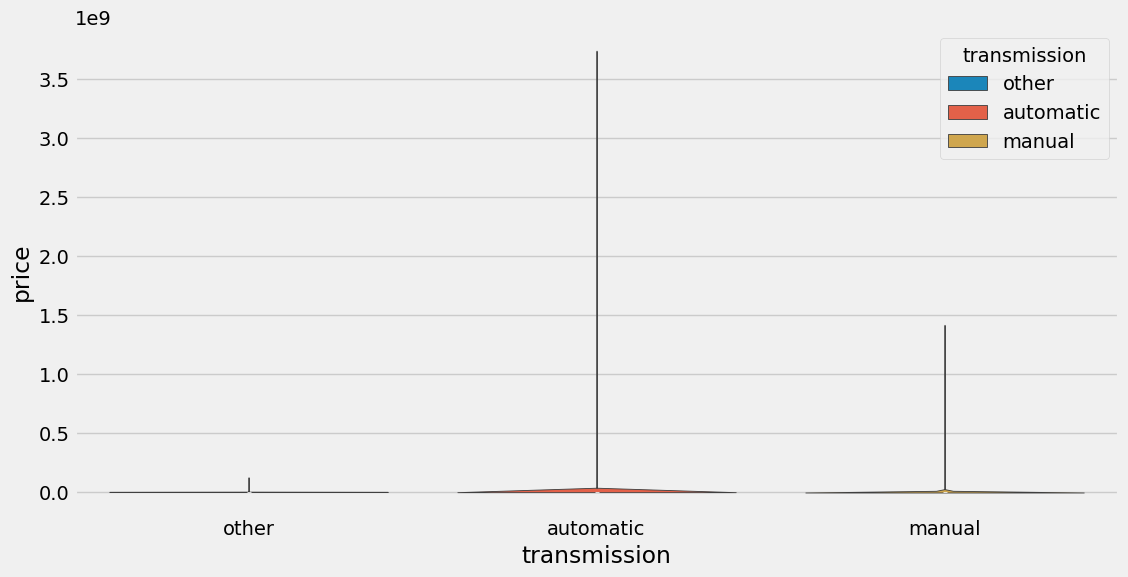

In [35]:
sns.violinplot(x = 'transmission', y = 'price', data = df, hue = "transmission");

## Data Pre-processing

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_iqr)
df_scaled = pd.DataFrame(df_scaled, columns=df_iqr.columns)

In [37]:
X=df_scaled.drop('price',axis=1)
y=df_scaled['price']

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
print(X_train.isna().sum())

region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
type            0
state           0
dtype: int64


In [40]:
print(X_test.isna().sum())

region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
type            0
state           0
dtype: int64


## Model Building

### Linear Regression

In [41]:
lr = LinearRegression()

In [42]:
# fit the model
lr.fit(X_train, y_train)

# R^2 of the model
lr_r2 = (lr.score(X_train, y_train))
print("The value of lr_r2 is {:.2f}".format(lr_r2))

# Predictions on test
lr_predict = lr.predict(X_test)

# rmse
lr_rmse = mean_squared_error(y_test, lr_predict, squared = False)
print("The value of lr rmse is {:.2f}".format(lr_rmse))

The value of lr_r2 is 0.29
The value of lr rmse is 0.83


### Ridge and Lasso Regression with polynomial and sequential features

In [43]:
ridge_pipe=Pipeline([('ply_feature',PolynomialFeatures(degree = 2, include_bias = False)),
                     ('pol_regres',Ridge())])
parameters_to_tune = [{'pol_regres__alpha':[0.1,10,100,1000]}]
grid=GridSearchCV(ridge_pipe, parameters_to_tune, cv=10)
grid.fit(X_train,y_train)
test_mse=mean_squared_error(grid.predict(X_test),y_test)
test_mae=mean_absolute_error(grid.predict(X_test),y_test)
test_rmse=np.sqrt(test_mse)
grid.best_params_,grid.best_score_,test_mse,test_mae,test_rmse

({'pol_regres__alpha': 100},
 0.410826029648077,
 0.5786770577913118,
 0.5481555059603339,
 0.760708260630389)

In [44]:
seq_ridge_pipe=Pipeline([('seq_feature',SequentialFeatureSelector(Ridge(),n_features_to_select=4)),
                     ('pol_regres',Ridge())])
parameters_to_tune = [{'pol_regres__alpha':[0.1,10,100,1000]}]
seq_ridge_grid=GridSearchCV(seq_ridge_pipe, parameters_to_tune, cv=10)
seq_ridge_grid.fit(X_train,y_train)
test_mse=mean_squared_error(seq_ridge_grid.predict(X_test),y_test)
test_mae=mean_absolute_error(seq_ridge_grid.predict(X_test),y_test)
test_rmse=np.sqrt(test_mse)
seq_ridge_grid.best_params_,seq_ridge_grid.best_score_,test_mse,test_mae,test_rmse

({'pol_regres__alpha': 10},
 0.2677167717351451,
 0.7193584486733082,
 0.6476239659771862,
 0.8481500154296457)

In [45]:
from sklearn.linear_model import Lasso
seq_lasso_pipe=Pipeline([('seq_feature',SequentialFeatureSelector(Lasso(),n_features_to_select=4)),
                     ('pol_regres',Lasso())])
parameters_to_tune = [{'pol_regres__alpha':[0.1,10,100,1000]}]
seq_lasso_grid=GridSearchCV(seq_lasso_pipe, parameters_to_tune, cv=10)
seq_lasso_grid.fit(X_train,y_train)
test_mse=mean_squared_error(seq_lasso_grid.predict(X_test),y_test)
test_mae=mean_absolute_error(seq_lasso_grid.predict(X_test),y_test)
test_rmse=np.sqrt(test_mse)
seq_lasso_grid.best_params_,seq_lasso_grid.best_score_,test_mse,test_mae,test_rmse

({'pol_regres__alpha': 0.1},
 0.04586728018129153,
 0.9490456885305688,
 0.8127917971505245,
 0.9741897600214081)

### Evaluation

In [46]:
# For Ridge Regression
ridge_best_features = seq_ridge_grid.best_estimator_.named_steps['seq_feature'].get_support(indices=True)
ridge_best_feature_names = X.columns[ridge_best_features]
print("Best features for Ridge Regression: ", ridge_best_feature_names)

# For Lasso Regression
lasso_best_features = seq_lasso_grid.best_estimator_.named_steps['seq_feature'].get_support(indices=True)
lasso_best_feature_names = X.columns[lasso_best_features]
print("Best features for Lasso Regression: ", lasso_best_feature_names)

best_params_ridge = grid.best_params_
best_features=ridge_best_feature_names
print("Best Features for Ridge Regression with polynomial features: ",best_features)

Best features for Ridge Regression:  Index(['year', 'cylinders', 'fuel', 'odometer'], dtype='object')
Best features for Lasso Regression:  Index(['region', 'year', 'manufacturer', 'model'], dtype='object')
Best Features for Ridge Regression with polynomial features:  Index(['year', 'cylinders', 'fuel', 'odometer'], dtype='object')


## Plot the residual plots of all the regressions

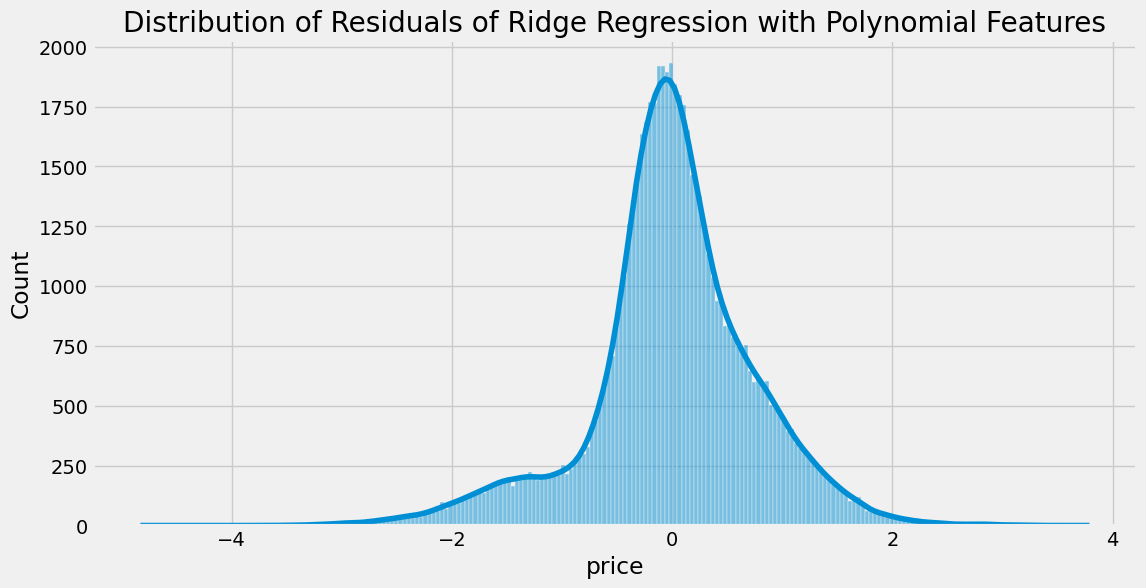

In [47]:
residuals = y_test - grid.predict(X_test)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals of Ridge Regression with Polynomial Features')
plt.savefig("images/ResDistRidgeRegwithPF.png",bbox_inches = 'tight')
plt.show()

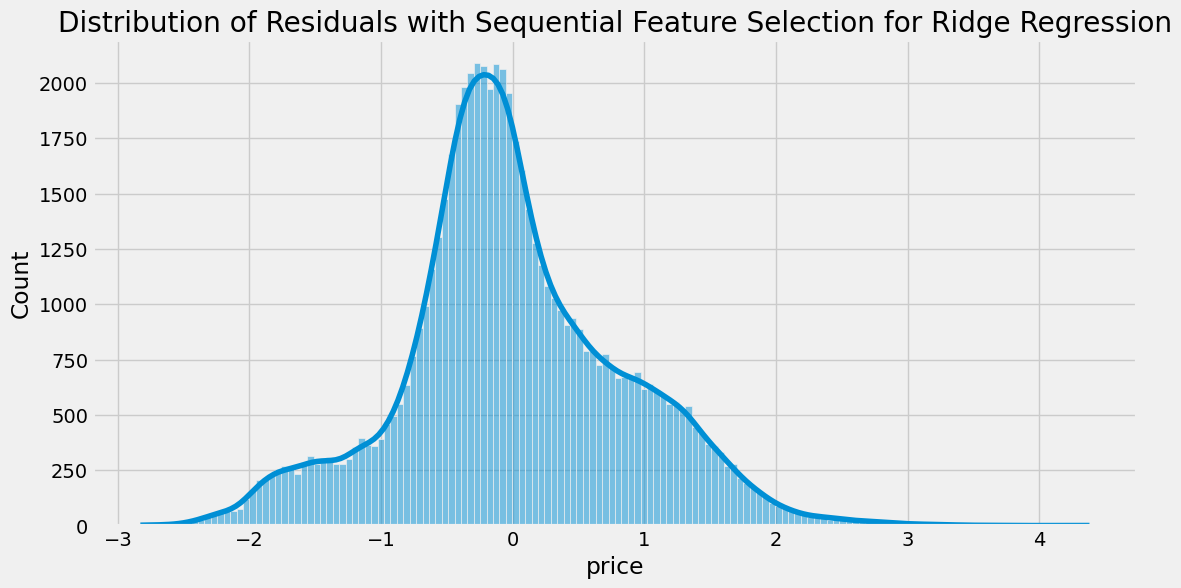

In [48]:
residuals = y_test - seq_ridge_grid.predict(X_test)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals with Sequential Feature Selection for Ridge Regression')
plt.savefig("images/ResDistRidgeRegwithSF.png",bbox_inches = 'tight')
plt.show()

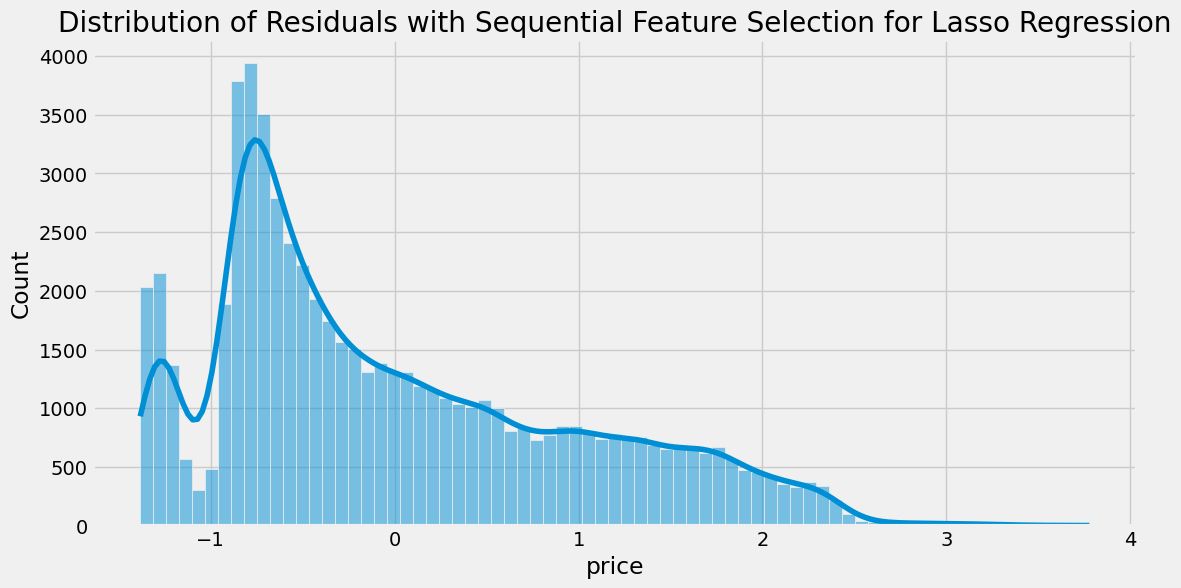

In [50]:
residuals = y_test - seq_lasso_grid.predict(X_test)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals with Sequential Feature Selection for Lasso Regression')
plt.savefig("images/RedDistLassoRegwithSF.png",bbox_inches = 'tight')
plt.show()

## Conclusion

Based on the analysis, the best model is the Ridge Regression with polynomial features. The best features for this model are:
1. year (manufacturing)
2. cylinders
3. fuel
4. odometer
   